In [1]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

# Dataset loading and basic exploration

In [2]:
water = pd.read_csv("data/water_potability.csv")
water.shape

(3276, 10)

In [3]:
water.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Finding the two most correlated attributes

In [5]:
most_correlated_attr = "attribute_name_here"
correlation_matrix = water.corr()
for attr in correlation_matrix:
    max_corr = 0
    idx = 0
    for value in correlation_matrix[attr]:
        if value != 1 and abs(value) > abs(max_corr):
            max_corr = value
            # get the name of the most correlated attribute
            most_correlated_attr = list(water.columns)[idx]
        idx+=1
    print(attr, most_correlated_attr, max_corr)

ph Solids -0.08928825011982429
Hardness Sulfate -0.10692345399851362
Solids Sulfate -0.17180427470199292
Chloramines Solids -0.07014757983260811
Sulfate Solids -0.17180427470199292
Conductivity Hardness -0.023914599662821827
Organic_carbon ph 0.04350334128238972
Trihalomethanes Sulfate -0.03027406187757645
Turbidity ph -0.03905666613664019
Potability Solids 0.03374331339365026


In [6]:
# long computation
#water_profile = ProfileReport(df=water, title="Analysis of the water dataframe", explorative=True)
#water_profile

## Missing values

In [7]:
water[water.ph.isna()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
13,NaN,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
20,NaN,227.435048,22305.567414,10.333918,NaN,554.820086,16.331693,45.382815,4.133423,0
22,NaN,215.977859,17107.224226,5.607060,326.943978,436.256194,14.189062,59.855476,5.459251,0
...,...,...,...,...,...,...,...,...,...,...
3224,NaN,198.218700,31081.735264,7.419106,NaN,517.925946,11.711419,85.428785,3.345543,1
3229,NaN,203.204659,10643.186771,6.828936,NaN,384.597711,16.011328,72.911573,3.065910,1
3231,NaN,225.754109,28194.452646,5.892830,366.201583,418.272901,17.306832,103.912548,3.855895,1
3245,NaN,188.536608,24711.414927,7.129520,NaN,555.548534,16.959269,56.038702,4.331691,1


# Dimensionality reduction

PCA can't handle missing values, so they must be removed

In [8]:
# removes all rows that have any missing values
water_no_missing = water.dropna(axis=0)

## Standardise the data

In [9]:
from sklearn.preprocessing import StandardScaler

potability = water_no_missing["Potability"]
water_data_no_missing = water_no_missing.drop(["Potability"], axis=1)
water_data_standardised = StandardScaler().fit(water_data_no_missing).transform(water_data_no_missing)

In [10]:
water_data_standardised[:3]

array([[ 0.7824658 ,  0.56411376,  0.01168692,  0.5838039 ,  0.57437811,
        -0.78396246,  1.22703167,  2.11165179,  0.84476056],
       [ 1.27546291, -0.45565257, -0.45583491, -0.37094728, -0.56048006,
        -0.34842885, -0.84215371, -2.14039865,  0.13503344],
       [-0.95483488, -0.23461412,  0.7906452 ,  0.25910357, -0.15891057,
        -1.81006276, -1.79234008, -0.7144228 , -1.80736621]])

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

water_pca = pca.fit(water_data_standardised).transform(water_data_standardised)
water_pca[:3]

array([[-0.89277496, -0.12034861],
       [-0.25428385, -0.28366897],
       [ 1.05212008,  0.52176466]])

In [12]:
for i,v in enumerate(pca.explained_variance_ratio_):
    print("Variance explained by component ", i+1, ": ", v, sep="")
water_no_missing.size

Variance explained by component 1: 0.13410811827499855
Variance explained by component 2: 0.13005307932987778


20110

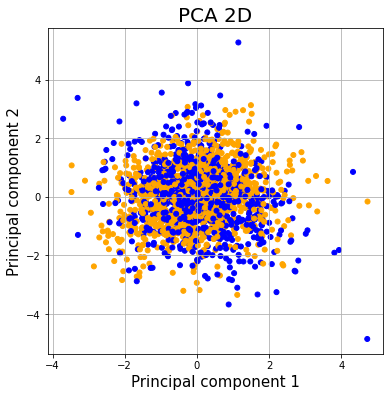

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

ax.set_title('PCA 2D', fontsize=20)
ax.set_xlabel('Principal component 1', fontsize=15)
ax.set_ylabel('Principal component 2', fontsize=15)
ax.grid()

ax.scatter(water_pca[:, 0], water_pca[:, 1], c=np.array(["orange", "blue"])[potability], s=25)

In [14]:
print(water_no_missing.columns)
pca.components_

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


array([[-0.47404071, -0.21606914,  0.66225649, -0.06779952, -0.45863379,
        -0.01664511, -0.16382524, -0.04620069,  0.21406511],
       [-0.38863879, -0.62587007, -0.16821895,  0.2597866 ,  0.54146414,
        -0.16084655, -0.08868279, -0.04434396,  0.18048214]])

In [ ]:
#depends on `water_data_standardised`

# K-means analysis
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

def avg(A):
    return sum(A)/len(A)

#initial data and parameters
X = water_data_standardised
max_k = 30
rep = 5

k_range = range(2, max_k + 1)
scores = []
scores_table_rep = []

#repeat rep times
for i in tqdm(range(rep)):
    scores = []
    #k-means
    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels, metric='euclidean')
        scores.append((k, score))
    scores_table_rep.append(scores)
#avg of scores
scores_final = [[]for i in range(rep)]
scores = []

for i in k_range:
    avg_res = avg([scores_table_rep[k][i - 2][1] for k in range(rep)])
    scores.append((i, avg_res))

#plot
ax_x, ax_y = zip(*scores)

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(k_range)
plt.grid()
plt.title("Analysis of number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.plot(ax_x, ax_y)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

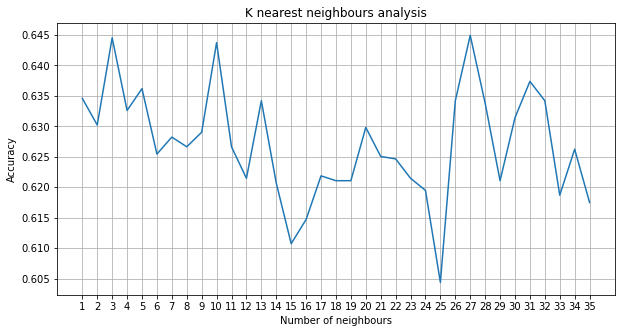

In [16]:
#depends on `water_no_missing`

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from seaborn import load_dataset
from sklearn import preprocessing
from tqdm.notebook import tqdm

def avg(A):
    return sum(A)/len(A)

#data
water_data_no_missing = water_no_missing
water_data_standardised = StandardScaler().fit(water_data_no_missing).transform(water_data_no_missing)
water_data_standardised_df = pd.DataFrame(water_data_standardised)
water_data_standardised_df.columns = water_no_missing.columns
X = water_data_standardised_df.drop(columns = ['Potability'])
y = water_data_standardised_df['Potability']

#global parameters
max_k = 35
rep = 5

scores = []
scores_table_rep = []

#repetition loop
for i in tqdm(range(rep)):
    scores = []
    #loop of k-nn
    for j in range(1, max_k + 1):
        #divide data into training and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        #convert y values to categorical values
        lab = preprocessing.LabelEncoder()
        y_test = lab.fit_transform(y_test)
        y_train = lab.fit_transform(y_train)

        #k-nn
        clf = KNeighborsClassifier(p=j)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        scores.append((i, accuracy_score(y_test, predictions)))
    scores_table_rep.append(scores)

#avg of scores            
scores_final = [[]for i in range(rep)]
scores = []

for i in range(1, max_k + 1):
    avg_res = avg([scores_table_rep[k][i - 1][1] for k in range(rep)])
    scores.append((i, avg_res))
    
#plot
ax_x, ax_y = zip(*scores)
        
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.xticks(range(1, max_k + 1))
plt.grid()
plt.title("K nearest neighbours analysis")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.plot(ax_x, ax_y)